In [2]:
import pandas as pd

import numpy as np

In [3]:
arrest_data = pd.read_csv("Arrest_Data_from_2010_to_Present.csv")

arrest_data.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
3,5615701,04/30/2019,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
4,5615929,04/30/2019,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [4]:
arrest_data.shape

(1310127, 17)

In [5]:
arrest_data.columns

Index(['Report ID', 'Arrest Date', 'Time', 'Area ID', 'Area Name',
       'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Address', 'Cross Street', 'Location'],
      dtype='object')

In [6]:
arrest_data['Arrest Date'].min()

'01/01/2010'

In [7]:
from datetime import datetime

In [8]:
arrest_data['Arrest Date'] = pd.to_datetime(arrest_data['Arrest Date'])

In [9]:
start_date = '01/01/2018'
end_date = '12/31/2018'

In [10]:
mask = (arrest_data['Arrest Date'] > '01/01/2018') & (arrest_data['Arrest Date'] <= '12/31/2018')

In [11]:
mask.tail()

1310122    False
1310123    False
1310124    False
1310125    False
1310126    False
Name: Arrest Date, dtype: bool

In [12]:
booking2018_data = arrest_data.loc[mask]

In [13]:
booking2018_data.head(3)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
156,5213460,2018-01-24,1930.0,6,Hollywood,668,29,M,H,10.0,Fraud/Embezzlement,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,ST ANDREWS,FOUNTAIN,"(34.0949, -118.3109)"
157,5257944,2018-03-15,310.0,7,Wilshire,743,33,F,O,1.0,Homicide,F,191.5(B)PC,VEH MANSLAUGHTR/OPER VESSEL DUI & DUR FEL,OLYMPIC,MASSELIN,"(34.0574, -118.3547)"
158,5328813,2018-06-01,1800.0,3,Southwest,356,44,F,B,16.0,Narcotic Drug Laws,F,11379(A)HS,TRANSPORT/SELL CONTROLLED SUBSTANCE,1600 W 36TH PL,NaN,"(34.0219, -118.3061)"


In [14]:
booking2018_data['Report ID'].count()

104040

In [15]:
booking2018_data.tail(3)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
1290588,5509344,2018-12-31,720.0,11,Northeast,1133,25,M,H,6.0,Larceny,M,490.2PC,PETTY THEFT,3100 GLENDALE BL,NaN,"(34.1119, -118.2529)"
1290595,5509947,2018-12-31,2320.0,4,Hollenbeck,408,23,M,H,16.0,Narcotic Drug Laws,F,11378HS,POSSESSION CONTROLLED SUBSTANCE FOR SALE,HUNTINGTON,ROSEMEAD,"(34.0872, -118.176)"
1290614,5509405,2018-12-31,1200.0,19,Mission,1921,28,F,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,15100 POLK ST,NaN,"(34.3009, -118.4696)"


Text(0.5, 0, 'Area ID')

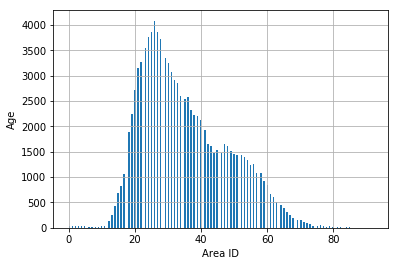

In [16]:
import matplotlib.pyplot as plt

booking2018_data['Age'].hist(bins = 200)

plt.ylabel('Age')

plt.xlabel('Area ID')


In [17]:
small = ['Vehicle Theft','Robbery','Burglary', 'Receive Stolen Property']

small_data=booking2018_data[booking2018_data['Charge Group Description'].isin(small)]

small_data.shape

(8428, 17)

In [18]:
small_data.tail(3)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
1290453,5509149,2018-12-30,2230.0,12,77th Street,1256,28,M,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,FLORENCE AV,BROADWAY ST,"(33.9747, -118.2783)"
1290486,5509524,2018-12-31,1300.0,11,Northeast,1128,21,M,B,3.0,Robbery,F,211PC,ROBBERY,YORK BL,FIGUEROA BL,"(34.1152, -118.1837)"
1290614,5509405,2018-12-31,1200.0,19,Mission,1921,28,F,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,15100 POLK ST,NaN,"(34.3009, -118.4696)"


In [19]:
small_data['Age'].sort_values 

<bound method Series.sort_values of 167        43
172        32
173        26
175        32
176        27
177        20
178        25
184        18
185        38
193        27
194        21
197        39
198        26
2586       26
2590       20
2616       31
2624       38
2625       25
2627       34
2628       32
2658       38
4733       21
4735       24
4737       59
4761       18
4762       19
4769       37
6754       33
6760       31
6774       19
           ..
1289157    17
1289163    31
1289166    26
1289171    32
1289174    38
1289175    18
1289179    16
1289184    25
1289189    19
1289228    43
1289232    23
1289236    39
1289400    24
1289405    28
1289537    38
1289830    27
1289927    23
1289945    33
1289953    58
1290025    28
1290062    23
1290107    36
1290132    20
1290147    31
1290201    22
1290288    39
1290333    18
1290453    28
1290486    21
1290614    28
Name: Age, Length: 8428, dtype: int64>

In [20]:
np.quantile(small_data['Age'], .95) 

52.0

In [21]:
mask10_18 = (arrest_data['Arrest Date'] >= '01/01/2010') & (arrest_data['Arrest Date'] <= '12/31/2018')

In [22]:
mask10_18.head(3)

0    False
1    False
2    False
Name: Arrest Date, dtype: bool

In [23]:
booking10_18_data = arrest_data.loc[mask10_18]

In [24]:
booking10_18_data.tail(3)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
1310112,9919836,2010-01-19,800.0,3,Southwest,361,37,F,O,6.0,Larceny,F,487(A)PC,GRAND THEFT MONEY/PROPERTY > $400,3900 GIBRALTAR AV,NaN,"(34.0161, -118.3547)"
1310113,8526595,2013-10-15,1645.0,15,N Hollywood,1505,22,M,H,24.0,Miscellaneous Other Violations,F,594(B)(1)PC,VANDALISM W/LOSS VALUED EQ OR > $400,7400 CAMELLIA AV,NaN,"(34.2061, -118.3823)"
1310114,9791154,2010-01-19,2200.0,8,West LA,857,37,F,O,13.0,Prostitution/Allied,M,647(B)PC,PROSTITUTION,1200 S BEVERLY DR,NaN,"(34.0546, -118.3953)"


In [25]:
booking10_18_data.shape

(1231627, 17)

In [26]:
arrest_data['Arrest Type Code'].head()

0    M
1    F
2    F
3    D
4    F
Name: Arrest Type Code, dtype: object

In [27]:
start_date = '01/01/2010'
end_date = '12/31/2010'


In [28]:
mask_10 = (arrest_data['Arrest Date'] >= '01/01/2010') & (arrest_data['Arrest Date'] <= '12/31/2010')
 

In [29]:
mask_10.head(3)

0    False
1    False
2    False
Name: Arrest Date, dtype: bool

In [30]:
arrest_data_10 = arrest_data.loc[mask_10].head(3)

In [31]:
arrest_data_10.tail(10)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
6722,2593624,2010-12-31,1915.0,7,Wilshire,776,41,M,B,24.0,Miscellaneous Other Violations,M,166(A)(4)PC,CONTEMPT OF COURT - DISOBEY COURT ORDER,4500 W WASHINGTON BL,NaN,"(34.0441, -118.3378)"
32877,2281627,2010-03-31,1730.0,15,N Hollywood,1525,37,M,W,6.0,Larceny,M,484(A)PC,GRAND THEFT (OVER $400),6100 LAUREL CANYON BL,NaN,"(34.1815, -118.3965)"
36970,2292485,2010-04-09,1700.0,19,Mission,1999,43,M,H,16.0,Narcotic Drug Laws,F,11350(A)HS,POSSESSION NARCOTIC CONTROLLED SUBSTANCE,WOODMAN,SATICOY,"(34.2095, -118.4309)"


In [32]:
arrest_data_10.head(100)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
6722,2593624,2010-12-31,1915.0,7,Wilshire,776,41,M,B,24.0,Miscellaneous Other Violations,M,166(A)(4)PC,CONTEMPT OF COURT - DISOBEY COURT ORDER,4500 W WASHINGTON BL,NaN,"(34.0441, -118.3378)"
32877,2281627,2010-03-31,1730.0,15,N Hollywood,1525,37,M,W,6.0,Larceny,M,484(A)PC,GRAND THEFT (OVER $400),6100 LAUREL CANYON BL,NaN,"(34.1815, -118.3965)"
36970,2292485,2010-04-09,1700.0,19,Mission,1999,43,M,H,16.0,Narcotic Drug Laws,F,11350(A)HS,POSSESSION NARCOTIC CONTROLLED SUBSTANCE,WOODMAN,SATICOY,"(34.2095, -118.4309)"


In [33]:
import re
    
fel = arrest_data_10['Arrest Type Code'].str.contains('F')

felo_10 = arrest_data_10[fel]

felo_10



,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
36970,2292485,2010-04-09,1700.0,19,Mission,1999,43,M,H,16.0,Narcotic Drug Laws,F,11350(A)HS,POSSESSION NARCOTIC CONTROLLED SUBSTANCE,WOODMAN,SATICOY,"(34.2095, -118.4309)"


In [34]:
felo_10

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
36970,2292485,2010-04-09,1700.0,19,Mission,1999,43,M,H,16.0,Narcotic Drug Laws,F,11350(A)HS,POSSESSION NARCOTIC CONTROLLED SUBSTANCE,WOODMAN,SATICOY,"(34.2095, -118.4309)"


In [35]:
start_date = '01/01/2018'
end_date = '12/31/2018'

mask_18 = (arrest_data['Arrest Date'] >= '01/01/2018') & (arrest_data['Arrest Date'] <= '12/31/2018')
 

In [36]:
arrest_data_18 = arrest_data.loc[mask_18]

In [37]:
arrest_data_18.tail(3)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
1290588,5509344,2018-12-31,720.0,11,Northeast,1133,25,M,H,6.0,Larceny,M,490.2PC,PETTY THEFT,3100 GLENDALE BL,NaN,"(34.1119, -118.2529)"
1290595,5509947,2018-12-31,2320.0,4,Hollenbeck,408,23,M,H,16.0,Narcotic Drug Laws,F,11378HS,POSSESSION CONTROLLED SUBSTANCE FOR SALE,HUNTINGTON,ROSEMEAD,"(34.0872, -118.176)"
1290614,5509405,2018-12-31,1200.0,19,Mission,1921,28,F,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,15100 POLK ST,NaN,"(34.3009, -118.4696)"


In [38]:
feell =  arrest_data_18['Arrest Type Code'].str.contains('F')

felo_18 = arrest_data_18[feell]

In [39]:
felo_18.tail(3)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
1290583,5509487,2018-12-31,1545.0,1,Central,155,55,M,B,8.0,Other Assaults,F,422(A)PC,TERRORIZE CAUSING FEAR,5TH ST,MAPLE,"(34.0454, -118.2466)"
1290595,5509947,2018-12-31,2320.0,4,Hollenbeck,408,23,M,H,16.0,Narcotic Drug Laws,F,11378HS,POSSESSION CONTROLLED SUBSTANCE FOR SALE,HUNTINGTON,ROSEMEAD,"(34.0872, -118.176)"
1290614,5509405,2018-12-31,1200.0,19,Mission,1921,28,F,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,15100 POLK ST,NaN,"(34.3009, -118.4696)"


In [40]:
felo_18.shape

(34948, 17)

In [41]:
felo_18.shape

(34948, 17)

In [42]:
# equation of the line of  best fit : Y = mX + b

# the line of best fits passes through points K(2010, 1), L(2018, 34948),  m = 34948-1/2018-2010 <==> m = 34947/8 = 4368.375

# if X = 2010, Y = 1, B = Y - mX  <==> B = 1 - 4368.37 x 2010 <==> b = - 8,780,432.75

# Equation of the line of best fit Y = 4368.375X - 8,780,432.75

# extrapolation: 

# if X = 2019, Y= 4368.375 X 2019 - 8,780,432.75 = 39,316.375

# So if X = 2019, Y = 39,316 representing the point M(2019, 39,316)


In [43]:
arrest_data_18['Area Name'].value_counts(dropna=False).head()

Central        10951
Hollywood       9715
Rampart         7345
Pacific         6778
77th Street     6259
Name: Area Name, dtype: int64

In [44]:
arrest_data_18['Area Name'].value_counts(dropna=False).tail()

Devonshire    3146
Topanga       3094
Foothill      3006
West LA       2687
Wilshire      2467
Name: Area Name, dtype: int64

In [45]:
emil_2018 = arrest_data_18[~arrest_data_18['Charge Group Description'].isin(["Pre-Delinquency", "Non-Criminal Detention"])]

In [46]:
emil_2018.head(100)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
156,5213460,2018-01-24,1930.0,6,Hollywood,668,29,M,H,10.0,Fraud/Embezzlement,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,ST ANDREWS,FOUNTAIN,"(34.0949, -118.3109)"
157,5257944,2018-03-15,310.0,7,Wilshire,743,33,F,O,1.0,Homicide,F,191.5(B)PC,VEH MANSLAUGHTR/OPER VESSEL DUI & DUR FEL,OLYMPIC,MASSELIN,"(34.0574, -118.3547)"
158,5328813,2018-06-01,1800.0,3,Southwest,356,44,F,B,16.0,Narcotic Drug Laws,F,11379(A)HS,TRANSPORT/SELL CONTROLLED SUBSTANCE,1600 W 36TH PL,NaN,"(34.0219, -118.3061)"
159,5336331,2018-06-10,200.0,13,Newton,1364,23,M,H,12.0,Weapon (carry/poss),F,25400(A)2PC,CARRYING CONCEALED WEAPON UPON PERSON,1200 E 50TH ST,NaN,"(33.998, -118.2543)"
160,5360731,2018-07-07,2330.0,18,Southeast,1832,32,M,B,12.0,Weapon (carry/poss),F,29800(A)1PC,POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,10700 S MAIN ST,NaN,"(33.9392, -118.2739)"
161,5404690,2018-08-25,1850.0,18,Southeast,1832,39,M,B,12.0,Weapon (carry/poss),F,29800(A)1PC,POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,10600 S MAIN ST,NaN,"(33.9402, -118.2739)"
162,5406551,2018-08-27,2300.0,18,Southeast,1842,31,M,B,12.0,Weapon (carry/poss),F,25400(A)1PC,CARRY CONCEALED WEAPON IN VEHICLE,109TH ST,GRAND,"(33.9374, -118.2805)"
165,5419122,2018-09-10,1620.0,12,77th Street,1251,57,M,B,8.0,Other Assaults,F,422(A)PC,TERRORIZE CAUSING FEAR,3100 W 71ST ST,NaN,"(33.9757, -118.3265)"
166,5430543,2018-09-23,1830.0,13,Newton,1321,25,M,H,24.0,Miscellaneous Other Violations,F,594(B)(1)PC,VANDALISM W/LOSS VALUED EQ OR > $400,23RD,TRINITY,"(34.0289, -118.2686)"
167,5449454,2018-10-15,2330.0,1,Central,157,43,M,H,7.0,Vehicle Theft,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,SPRING,5TH,"(34.0416, -118.244)"


In [47]:
'Pre-Delinquency' in emil_2018['Charge Group Description']

False

In [48]:
"Non-Criminal Detention" in emil_2018['Charge Group Description']

False

In [49]:
import re

regex = re.compile(r"\s([A-Z]....)\s")

booleans = []

for result in emil_2018['Charge Group Description']:
    
    if not re.search('\s([A-Z]....)\s', result):
        
        booleans.append(True)
        
    else:
        
        booleans.append(False)
        

TypeError: expected string or bytes-like object